# Portfolio-Programmieraufgabe 5
## Radverkehr an der TUB
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, Moritz Thömen, 2024 -->

An vielen Stellen an den Straßen Berlins befinden sich [Fahrrad-Verkehrszählstellen](https://www.berlin.de/sen/uvk/mobilitaet-und-verkehr/verkehrsplanung/radverkehr/weitere-radinfrastruktur/zaehlstellen-und-fahrradbarometer/). 
Diese sind meist unsichtbar in den Boden der Fahrradwege eingelassen. 
Mitunter sind sie jedoch auch mit deutlich sichtbaren Displays zur Darstellung der Zahlen ausgestattet, so z.B. vor dem Mathegebäude der TU Berlin.
Die stündliche aufgezeichneten Daten der Zählstellen sind [frei abrufbar](https://www.berlin.de/sen/uvk/_assets/verkehr/verkehrsplanung/radverkehr/weitere-radinfrastruktur/zaehlstellen-und-fahrradbarometer/gesamtdatei-stundenwerte.xlsx), mit dem Aufzeichnungsbeginn der ersten Zählstation im März 2012. Die TU selbst kam erst später hinzu.

In dieser PA sollen Sie die Daten der Jahre 2022 und 2023 laden, untersuchen und visuell aufbereiten. Außerdem sollen Sie ein einfaches Modell entwerfen, mithilfe dessen Sie grob vorhersagen können, wie viele Fahrräder (je nach Wetterlage) zu erwarten sind.

Verwenden Sie für diese PA folgende Module:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) Fahrraddaten laden _(2 Punkte)_

Zunächst sind die Fahrraddaten zu laden (`Radverkehr_TU.csv`). 
Verwenden Sie dafür das bereits oben importierte [pandas-Modul](https://pandas.pydata.org/docs/getting_started/overview.html). 
Ein Vorteil dabei ist, dass sich mit pandas über den [moduleigenen Datentyp DataFrame](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html) unterschiedliche tabellarische Datenstrukturen (wie Sie sie in Datenbanken oder in Tabellenkalkulationsprogrammen finden) sehr komfortabel verarbeiten lassen.


In der hier zu ladenden Datei befinden sich drei Spalten: eine namens "Date" für das Datum (+ Uhrzeit) und zwei weitere mit den Namen "East" bzw. "West" (letztere ist die Zählstation vorm Mathegebäude) mit einfachen Zahlenwerten.
Dahinter verbirgt sich jeweils die konkrete Anzahl der zum jeweiligen Zeitpunkt seit dem vorhergehenden Zeitpunkt vorbeigefahrenen Räder.

#### 1.1) Importieren der Daten

[Laden](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Sie die Fahrraddaten gesammelt als [pandas-DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) in die Variable `fahrraddaten`. Am Ende der Zelle wird sie aufgerufen und sollte dadurch bereits einen Ausschnitt des Inhalts zeigen. 
Auf einzelne Spalten können Sie übrigens auf mehrere Arten zugreifen: entweder wie auf ein Dictionary (`Variable["Spaltenname"]`) oder wie auf eine Objekteigenschaft (`Variable.Spaltenname`).
Während die zweite Variante mitunter schneller von der Hand geht, ist im allgemeinen die Dictionary-Variante empfehlenswert, da dann auch Leerzeichen im Spaltennamen oder Platzhalter-Variablen verwendet werden können.

Erstellen Sie neben `fahrraddaten` noch [folgende Variablen](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats):

 * `mittelwert_east` - die durchschnittlich pro Stunde vorbeifahrenden Fahrräder auf der "East"-Seite
 * `summe_west` - die insgesamt in den zwei Jahren auf der "West"-Seite vorbeigefahrenen Fahrräder
 

In [2]:
# Hier eigenen Code schreiben ...

# CSV-Datei mit Semikolon-Trennung
fahrraddaten = pd.read_csv("Radverkehr_TU.csv", sep=";")

# Durchschnittlich pro Stunde vorbeifahrende Fahrräder auf der East-Seite
mittelwert_east = fahrraddaten["East"].mean()

# Insgesamt vorbeigefahrene Fahrräder auf der West-Seite (über beide Jahre)
summe_west = fahrraddaten["West"].sum()

fahrraddaten

,Date,East,West
0,2022-01-01 00:00:00,7.0,9.0
1,2022-01-01 01:00:00,5.0,5.0
2,2022-01-01 02:00:00,4.0,7.0
3,2022-01-01 03:00:00,3.0,6.0
4,2022-01-01 04:00:00,1.0,5.0
...,...,...,...
17515,2023-12-31 19:00:00,10.0,11.0
17516,2023-12-31 20:00:00,14.0,9.0
17517,2023-12-31 21:00:00,3.0,5.0
17518,2023-12-31 22:00:00,14.0,5.0


In [3]:
# Hier ist ein Plausibilitätstest:
assert int(summe_west/mittelwert_east/fahrraddaten.shape[0]) == 1

Die pandas-Bibliothek erlaubt einfache und intuitive Verarbeitung der Daten, ähnlich, wie Sie das z.B. schon von NumPy-Arrays kennen.
Mit dem folgenden Befehl wird eine neue Spalte erzeugt, die die Differenz der Stundenwerte zwischen West und East enthält:

In [4]:
fahrraddaten["Differenz"] = fahrraddaten["West"]-fahrraddaten["East"]
fahrraddaten

,Date,East,West,Differenz
0,2022-01-01 00:00:00,7.0,9.0,2.0
1,2022-01-01 01:00:00,5.0,5.0,0.0
2,2022-01-01 02:00:00,4.0,7.0,3.0
3,2022-01-01 03:00:00,3.0,6.0,3.0
4,2022-01-01 04:00:00,1.0,5.0,4.0
...,...,...,...,...
17515,2023-12-31 19:00:00,10.0,11.0,1.0
17516,2023-12-31 20:00:00,14.0,9.0,-5.0
17517,2023-12-31 21:00:00,3.0,5.0,2.0
17518,2023-12-31 22:00:00,14.0,5.0,-9.0


#### 1.2) Daten visualisieren

  * Erstellen Sie eine neue Spalte "Datum" im DataFrame `fahrraddaten`, die das Datum im [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)-Format enthält, sodass es sich als Zahlenwert interpretieren lässt. 
  * Plotten Sie die stündlich gemessene Anzahl der Fahrräder für beide Richtungen über der Zeit. Erstellen Sie zwei untereinander angeordnete Subplots:
      1. Zeitverlauf für den gesamten Zwei-Jahres-Zeitraum
      2. Ausschnitt des Zeitverlaufs von 2 Wochen vor der Stundenmaximalzahl in Ostrichtung bis 2 Wochen danach
  * In jedem Subplot sollen beide Richtungen visualisiert werden. Nutzen Sie eine Legende, um die Kurven zu kennzeichnen
  * Verwenden Sie sinnvolle Achsenbeschriftungen.
  * Geben Sie den Zeitabschnitt (Datum und Stunde), in dem [die meisten](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) Fahrräder in Ostrichtung gemessen wurden, als gut zuordenbare [Annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) innerhalb des 2. Diagramms aus. [Formatieren](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.strftime.html) Sie die Ausgabe in dieser Art und Weise: 
      * `In der 18. Stunde des 29.01.2022 fuhren 27 Fahrrräder in Ostrichtung.`


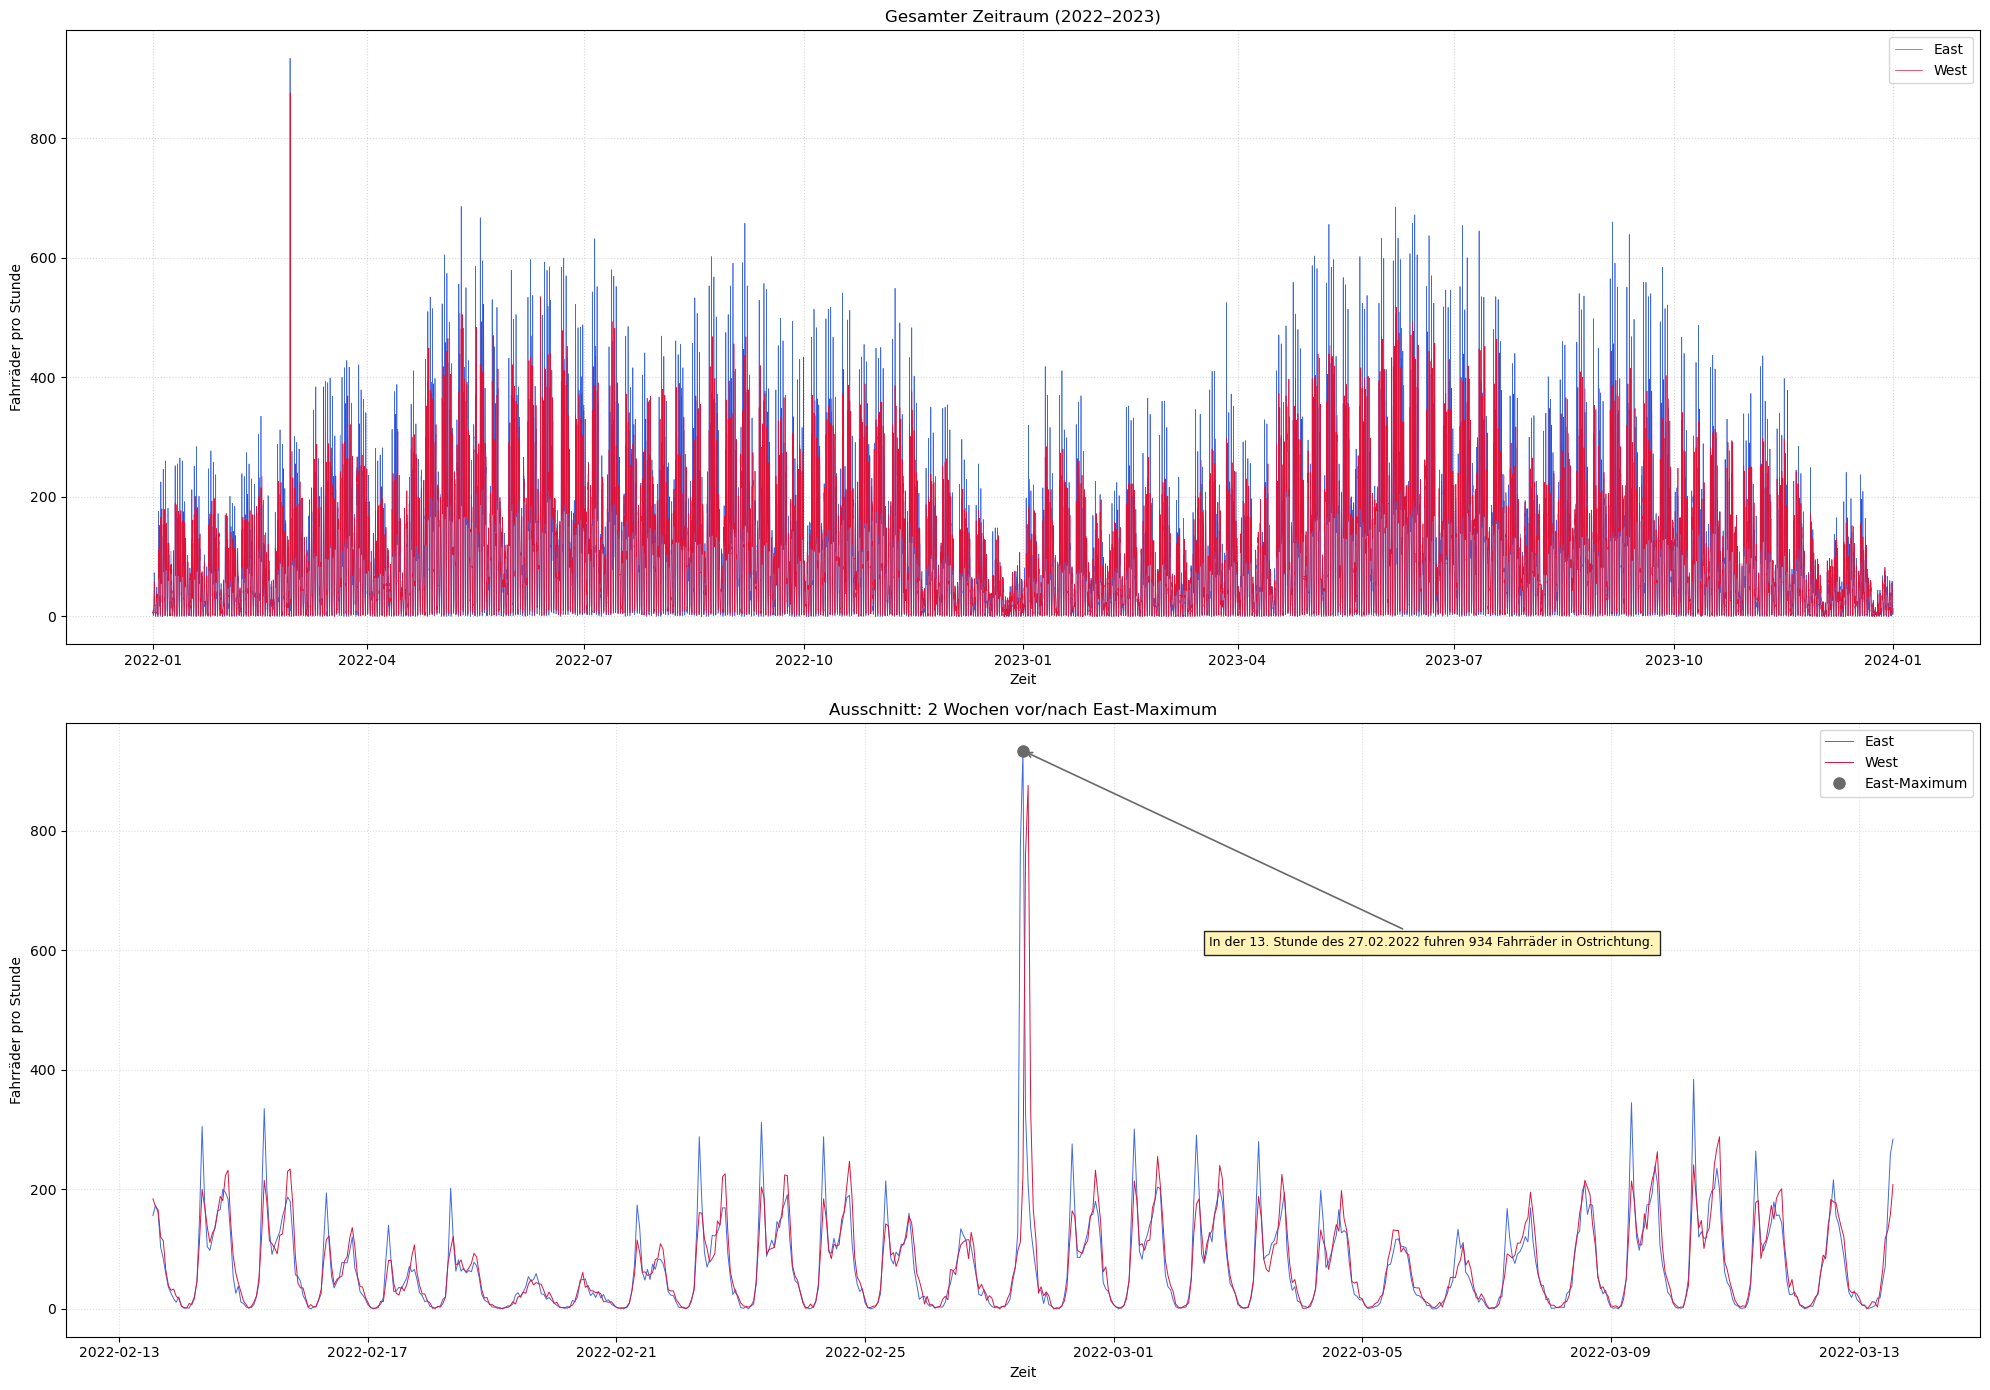

In [5]:
plt.figure(1,(20,14))
plt.subplot(211)

# Hier eigenen Code schreiben ...

# Datum als datetime speichern
fahrraddaten["Datum"] = pd.to_datetime(fahrraddaten["Date"])

# Stundenmaximum in Ostrichtung (East) finden
index_max_east = fahrraddaten["East"].idxmax()
zeit_max_east = fahrraddaten.loc[index_max_east, "Datum"]
max_east = fahrraddaten.loc[index_max_east, "East"]

# Zeitfenster: 2 Wochen davor bis 2 Wochen danach
start_2wochen = zeit_max_east - pd.Timedelta(days=14)
ende_2wochen  = zeit_max_east + pd.Timedelta(days=14)

maske_2wochen = (fahrraddaten["Datum"] >= start_2wochen) & (fahrraddaten["Datum"] <= ende_2wochen)
ausschnitt_2wochen = fahrraddaten[maske_2wochen]

# Plot 1: kompletter Zeitraum (oben)
plt.plot(fahrraddaten["Datum"], fahrraddaten["East"], label="East", color="royalblue", linewidth=0.5)
plt.plot(fahrraddaten["Datum"], fahrraddaten["West"], label="West", color="crimson", linewidth=0.5)

plt.legend(loc="upper right")
plt.xlabel("Zeit")
plt.ylabel("Fahrräder pro Stunde")
plt.title("Gesamter Zeitraum (2022–2023)")
plt.grid(True, linestyle=":", alpha=0.5)

# Plot 2: Ausschnitt um das Maximum (unten)
plt.subplot(212)
plt.plot(ausschnitt_2wochen["Datum"], ausschnitt_2wochen["East"], label="East", color="royalblue", linewidth=0.7)
plt.plot(ausschnitt_2wochen["Datum"], ausschnitt_2wochen["West"], label="West", color="crimson", linewidth=0.7)

# Maximum markieren
mark_farbe = "dimgray"
plt.plot(zeit_max_east, max_east, "o", color=mark_farbe, markersize=8, label="East-Maximum")

plt.legend(loc="upper right")
plt.xlabel("Zeit")
plt.ylabel("Fahrräder pro Stunde")
plt.title("Ausschnitt: 2 Wochen vor/nach East-Maximum")
plt.grid(True, linestyle=":", alpha=0.4)

# Annotation
annotation_text = f"In der {zeit_max_east.hour}. Stunde des {zeit_max_east.strftime('%d.%m.%Y')} fuhren {int(max_east)} Fahrräder in Ostrichtung."
plt.annotate(
    annotation_text,
    xy=(zeit_max_east, max_east),
    xytext=(zeit_max_east + pd.Timedelta(days=3), max_east * 0.65),
    fontsize=9,
    color="black",
    bbox=dict(facecolor="#FFF2AA", alpha=0.85, edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color=mark_farbe, lw=1.2)
)

plt.tight_layout()
plt.show()

In [6]:
# Hier ist ein Plausibilitätstest:
assert "Datum" in fahrraddaten.columns

### 2) Durchschnittlicher Radverkehr _(2 Punkte)_

Um einen Überblick über das durchschnittliche Tagesgeschehen zu erhalten, werten Sie für beide Fahrtrichtungen die über alle Tage gemittelte Anzahl an Fahrrädern für jede Stunde aus.
Erstellen Sie folgende Abbildung:
 - Plotten Sie einen repräsentativen Tagesverlauf für beide Richtungen in ein Diagramm.
 - Hierfür empfiehlt es sich, die Datensätze für die Auswertung [geeignet](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.time.html) zu [gruppieren](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).
 - Plotten Sie den 2-Jahres-Mittelwert für jede Stunde mit der jeweils zugehörigen Standardabweichung als [Fehlerbalken ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).
 - Achten Sie für eine besseres Diagrammverständnis darauf, dass sich die Fehlerbalken für Ost und West nicht überdecken, indem Sie die Kurven mit einem kleinen Offset in x-Richtung plotten.
 - Achten Sie auf korrekte Achsenbeschriftung und eine Legende.

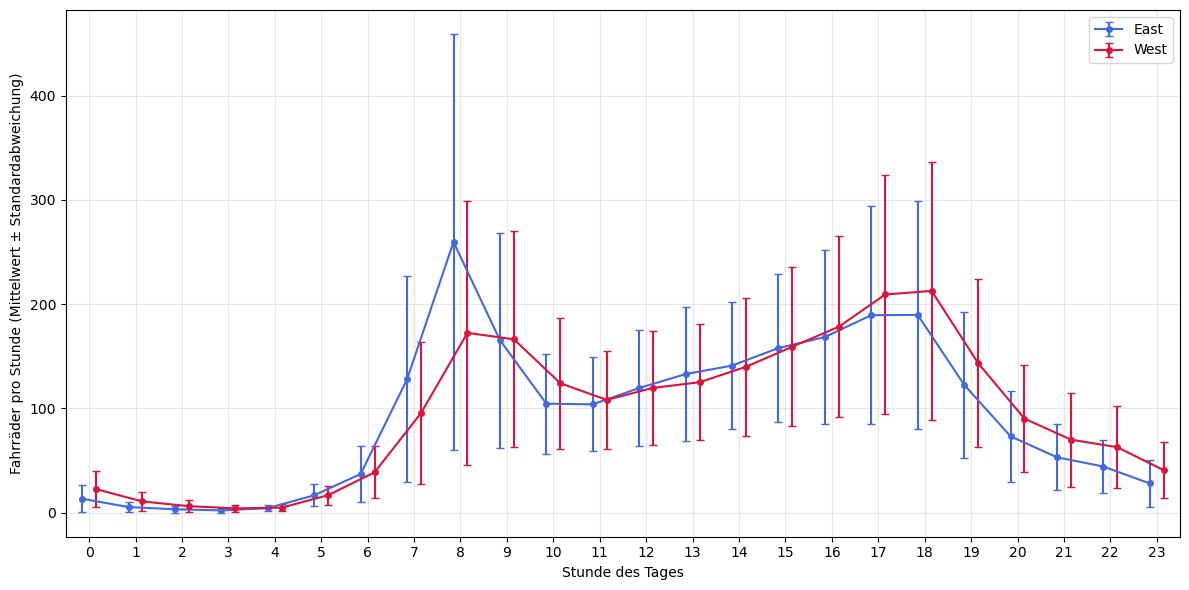

In [7]:
# Hier eigenen Code schreiben ...

# Stunde aus Datum (0–23)
fahrraddaten["Stunde"] = fahrraddaten["Datum"].dt.hour

# Pro Stunde: Mittelwert + Standardabweichung (2 Jahre zusammen)
tabelle = fahrraddaten.groupby("Stunde")[["East", "West"]].agg(["mean", "std"])

mittelwert_east = tabelle[("East", "mean")]
std_east = tabelle[("East", "std")]
mittelwert_west = tabelle[("West", "mean")]
std_west = tabelle[("West", "std")]

stunden = tabelle.index

# kleiner x-Offset -> keine Überdeckung der Fehlerbalken
offset = 0.15
stunden_east = stunden - offset
stunden_west = stunden + offset

fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(stunden_east, mittelwert_east, yerr=std_east, label="East", fmt="-o", capsize=3, color="royalblue", markersize=4)
ax.errorbar(stunden_west, mittelwert_west, yerr=std_west, label="West", fmt="-o", capsize=3, color="crimson", markersize=4)
ax.grid(True, alpha=0.3)

ax.set_xticks(range(24))
ax.set_xlim(-0.5, 23.5)
ax.set_xlabel("Stunde des Tages")
ax.set_ylabel("Fahrräder pro Stunde (Mittelwert ± Standardabweichung)")
ax.legend()

plt.tight_layout()
plt.show()

### 3) Wetterdaten _(2 Punkte)_

Der Deutsche Wetterdienst stellt vielfältige [Wetteraufzeichnungen als Datensätze](https://cdc.dwd.de/portal/202209231028/view1) zur Verfügung. 
Im Folgenden werden einige Daten der Wetterstation der FU in Berlin Dahlem ausgewertet.

Laden Sie die Wetterdaten aus der Datei `wetter_berlin_dahlem.csv` in die Variable `wetterdaten`. Auch diese sind wieder stundenweise aufgezeichnet. Wandeln Sie das Messdatum in dasselbe Format wie das der Raddaten um und speichern es in einer neuen Spalte "Datum". 
Beachten Sie dabei, dass der Zeitstempel hier anders als oben aussieht (4 Stellen fürs Jahr, dann je 2 für Monat, Tag und Stunde, alles direkt hintereinander).

Plotten Sie den Temperaturverlauf (Spaltenbezeichnung `TT_TU` für die gesamte verfügbare Zeit. Bereiten Sie dafür die Daten etwas auf:
  * _Ersetzen_ Sie alle unrealistischen Temperaturen (z.B. kleiner als -300) in `wetterdaten` mit [NaN](https://numpy.org/doc/stable/reference/constants.html#numpy.nan). Verwenden Sie hierfür [sinnvolle Indizierung](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), um direkt auf die Einträge zugreifen zu können.
  * [Sortieren](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) Sie die Einträge nach aufsteigendem Datum.
  * Hinterlegen Sie ein Gitter und achten Sie auf korrekte Achsenbeschriftungen.


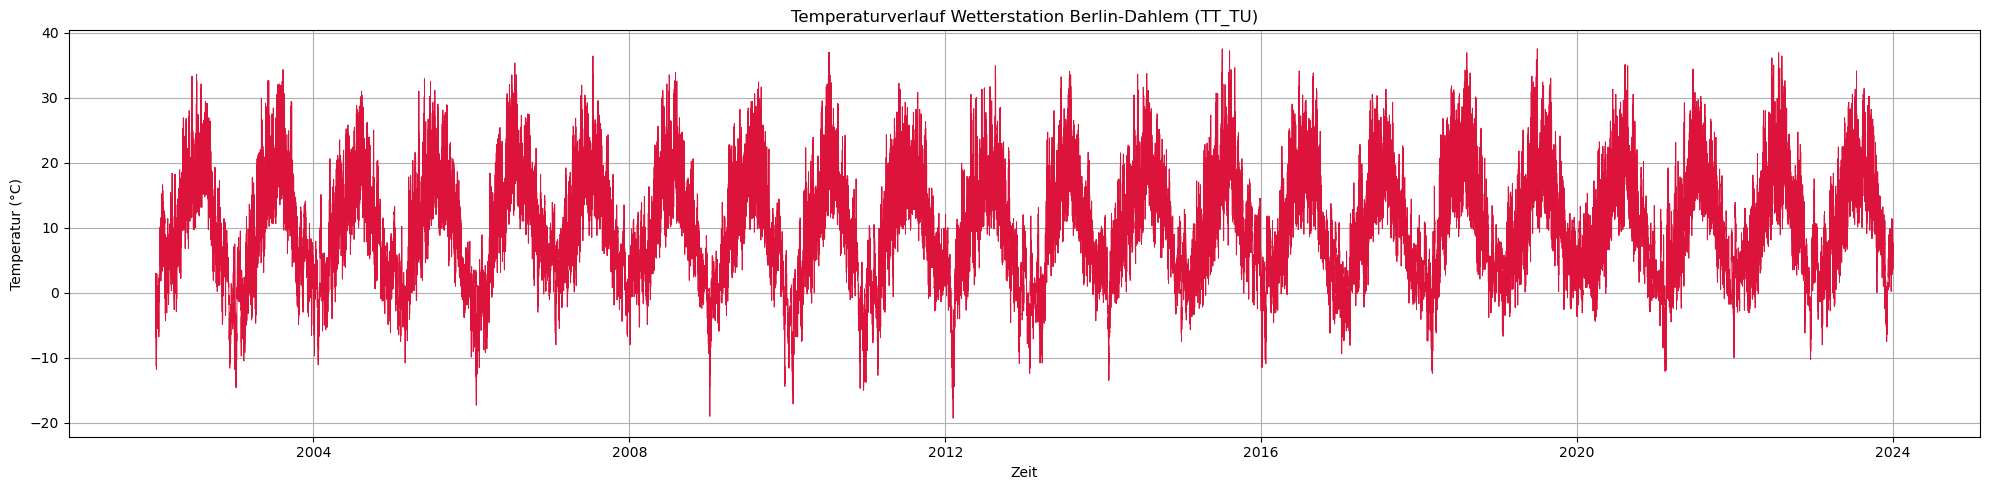

In [8]:
plt.figure(2,(20,5))

# Hier eigenen Code schreiben ...

# Wetterdaten laden (Komma-getrennt)
wetterdaten = pd.read_csv("wetter_berlin_dahlem.csv")

# Messdatum in datetime (YYYYMMDDHH)
wetterdaten["Datum"] = pd.to_datetime(wetterdaten["MESS_DATUM"], format="%Y%m%d%H")

# Temperatur als Zahl + unrealistische Werte zu NaN
wetterdaten["TT_TU"] = pd.to_numeric(wetterdaten["TT_TU"], errors="coerce")
wetterdaten.loc[wetterdaten["TT_TU"] < -300, "TT_TU"] = np.nan

# Nach Datum sortieren
wetterdaten = wetterdaten.sort_values("Datum").reset_index(drop=True)

plt.plot(wetterdaten["Datum"], wetterdaten["TT_TU"], color="crimson", linewidth=0.7)
plt.grid(True)
plt.xlabel("Zeit")
plt.ylabel("Temperatur (°C)")
plt.title("Temperaturverlauf Wetterstation Berlin-Dahlem (TT_TU)")

plt.tight_layout()
plt.show()

In [9]:
# Hier ist ein Plausibilitätstest:
assert wetterdaten.loc[(wetterdaten['Datum'].dt.month<10) & (wetterdaten['Datum'].dt.month>3), "TT_TU"].median() > wetterdaten.loc[(wetterdaten['Datum'].dt.month>=10) | (wetterdaten['Datum'].dt.month<=3), "TT_TU"].median()

### 4) Daten kombinieren _(2 Punkte)_

Um mehrere DataFrames zu kombinieren, stehen [mehrere Methoden](https://pandas.pydata.org/docs/user_guide/merging.html) zur Verfügung. 
Im vorliegenden Fall bietet sich [_merge()_](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) an. 

Kombinieren Sie `fahrraddaten` und `wetterdaten` mithilfe der in beiden Tabellen enthaltenen "Datum"-Spalte, sodass jeder Zeile eine eindeutige Datumsangabe zugeordnet werden kann. Das sich ergebende DataFrame `kombidaten` soll nur solche Daten enthalten, für die bei _beiden_ Ausgangs-Tabellen auch Datumsangaben vorhanden sind. 

#### 4.1) Visualisierung Datenkombination

  * Erstellen Sie `kombidaten` eine weitere Spalte mit dem Namen "Gesamt", die jeweils die Summe der Vorbeifahrten in beiden Richtungen enthält.
  * Plotten Sie die Gesamtanzahl der Fahrräder über der Temperatur für alle Datenpunkte. 
  * Nutzen Sie als Plot-Marker der Uhrzeit entsprechend [eingefärbte Punkte](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). 
  * Achten Sie auf Beschriftung der Achsen sowie auf eine Farbskala für die Uhrzeit.
  

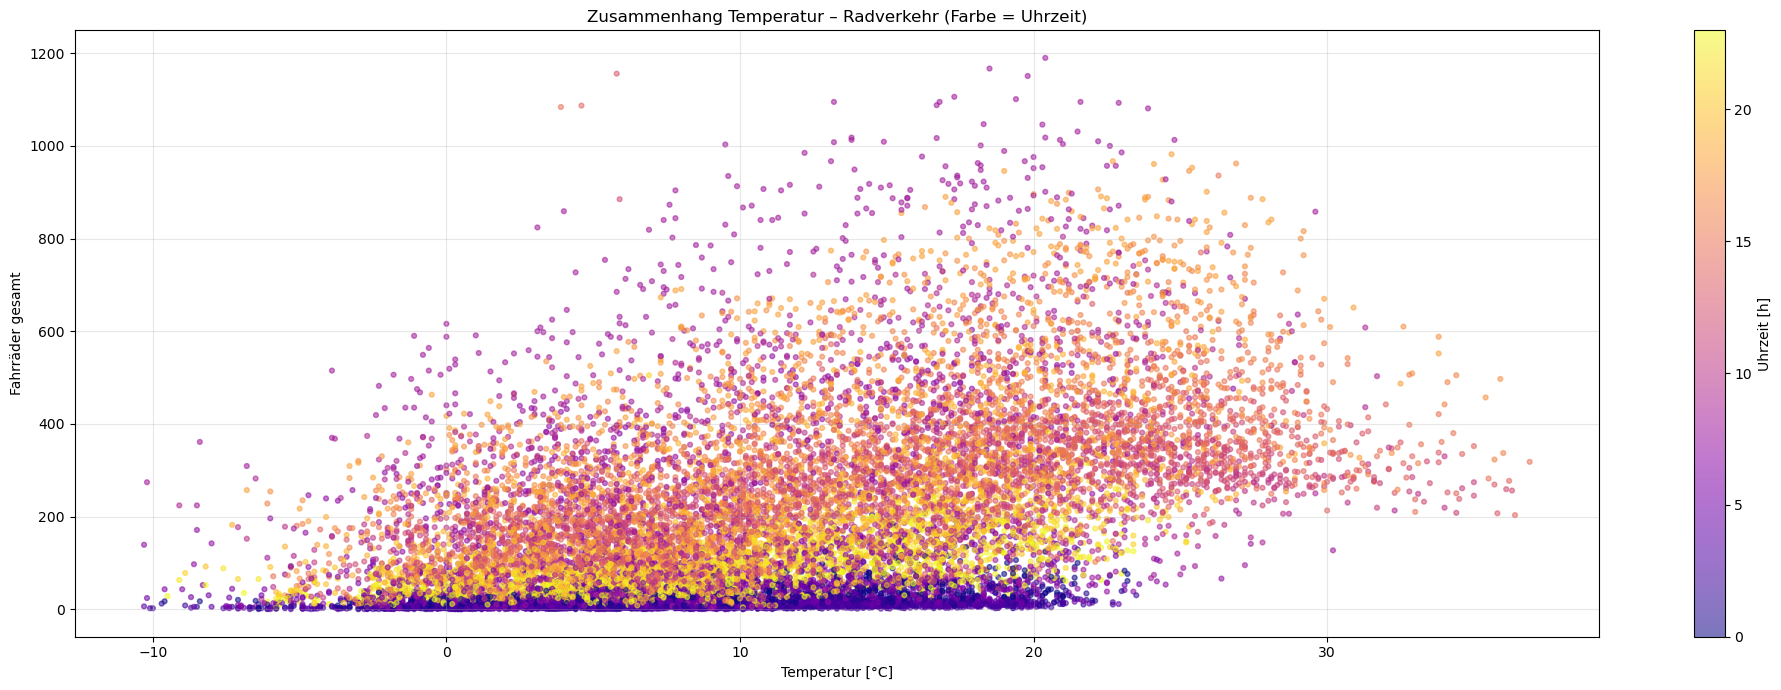

In [10]:
plt.figure(3,(20,7))

# Hier eigenen Code schreiben ...

# Aufgabe 4.1: Zeigt den Zusammenhang zwischen Temperatur und Radverkehr (Farbe = Uhrzeit)

# Beide Tabellen über die Datum-Spalte zusammenführen
# merge() ist wie ein Join in SQL: verbindet Tabellen über eine gemeinsame Spalte
# how="inner" = nur Zeilen behalten, bei denen BEIDE Tabellen einen Eintrag haben
kombidaten = pd.merge(fahrraddaten, wetterdaten, on="Datum", how="inner") 

# Gesamtzahl berechnen (Ost + West zusammen)
kombidaten["Gesamt"] = kombidaten["East"] + kombidaten["West"]

# Scatter-Plot: Temperatur vs. Fahrräder, eingefärbt nach Uhrzeit
# So sieht man z.B., ob morgens bei gleicher Temperatur mehr/weniger Räder fahren
uhr = kombidaten["Datum"].dt.hour

scatter = plt.scatter(
    kombidaten["TT_TU"], kombidaten["Gesamt"],
    c=uhr,           # Farbe nach Uhrzeit
    cmap="plasma",   # Farbskala (gelb = Mittag, lila = Nacht)
    s=12,            # Punktgröße
    alpha=0.55       # Transparenz, weil viele Punkte übereinander liegen
)

# Colorbar für die Uhrzeit-Skala
cb = plt.colorbar(scatter)
cb.set_label("Uhrzeit [h]")

# Achsenbeschriftung
plt.xlabel("Temperatur [°C]")
plt.ylabel("Fahrräder gesamt")
plt.title("Zusammenhang Temperatur – Radverkehr (Farbe = Uhrzeit)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Hier ist ein Plausibilitätstest:
assert kombidaten.shape[0] <= fahrraddaten.shape[0] < wetterdaten.shape[0]

#### 4.2) Visualisierung verarbeitete Datenkombination

 * Fügen Sie `kombidaten` eine Spalte "Relativanzahl" zu, in der für jeden Datensatz das Verhältnis der vorliegenden "Gesamt"-Zahl zur über alle Datensätze gemittelten Gesamtzahl _für diese Uhrzeit_ eingetragen wird. _(Hinweis: Auch hier kann es sinnvoll sein, Datensätze geeignet gruppiert zu behandeln und im Nachgang wieder DataFrames zu kombinieren.)_
 * Erstellen Sie nun ein DataFrame `teilkombi`, das diejenigen der Datensätze enthält, die 
     1. [nicht am Wochenende](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html) und 
     2. für die Zeiten zwischen (jeweils inklusive) 8 und 18 Uhr vorliegen und
     3. bei denen die relative Luftfeuchte ("RF_TU") unter 50 % liegt.
 * Plotten Sie die Relativzahl des gefilterten DataFrames `teilkombi` über der Temperatur mit Punkten beliebiger Einfärbung.

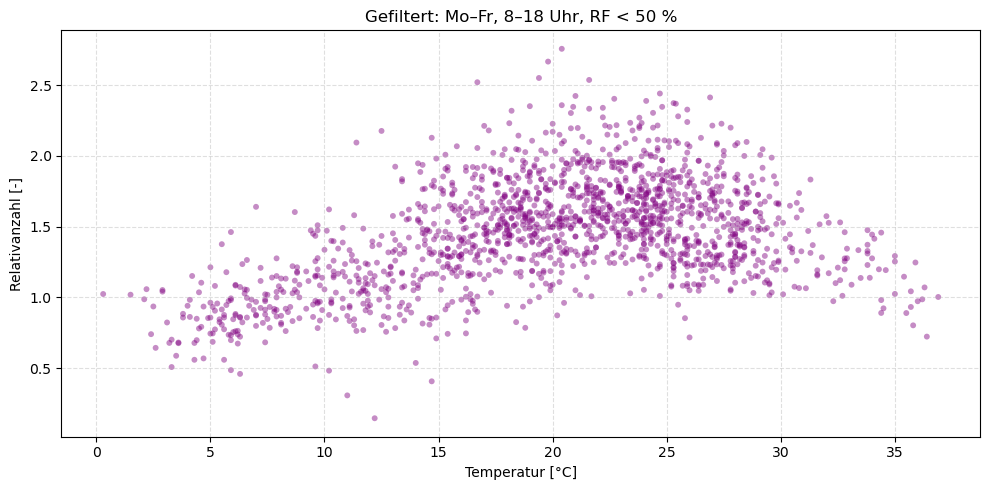

In [12]:
plt.figure(4,(10,5))
# Hier eigenen Code schreiben ...

# Aufgabe 4.2: Relativanzahl berechnen und Daten filtern
# Zeigt, wie sich die Fahrradanzahl relativ zum Stunden-Durchschnitt verhält

# Relativanzahl berechnen
# Idee: Vergleich der aktuellen Fahrradanzahl mit dem "Normalwert" für diese Uhrzeit
# Beispiel: Fahren morgens um 8 Uhr normalerweise 50 Räder und heute 75,
# dann ist die Relativanzahl = 75 / 50 = 1.5 (also 50 % mehr als normal)

kombidaten["Stunde"] = kombidaten["Datum"].dt.hour

# Durchschnitt pro Stunde
# transform() gibt für jede Zeile den Mittelwert der jeweiligen Stunde zurück
avg_per_hour = kombidaten.groupby("Stunde")["Gesamt"].transform("mean")
kombidaten["Relativanzahl"] = kombidaten["Gesamt"] / avg_per_hour

# Filtern nach den drei Bedingungen aus der Aufgabe:
# 1. kein Wochenende (Mo–Fr = 0–4, Sa–So = 5–6)
# 2. zwischen 8 und 18 Uhr (inklusive)
# 3. relative Luftfeuchtigkeit unter 50 %

wd = kombidaten["Datum"].dt.weekday  # Wochentag
hr = kombidaten["Stunde"]            # Stunde
rf = kombidaten["RF_TU"]             # relative Luftfeuchtigkeit

# Alle Bedingungen mit & kombinieren
filt = (wd < 5) & (hr >= 8) & (hr <= 18) & (rf < 50)
teilkombi = kombidaten[filt].copy()

# Scatter-Plot
plt.scatter(
    teilkombi["TT_TU"], teilkombi["Relativanzahl"],
    c="purple",        # violette Punkte
    alpha=0.45,        # leichte Transparenz
    s=18,              # Punktgröße
    edgecolors="none"  # kein Rand um die Punkte
)

# Achsenbeschriftung
plt.xlabel("Temperatur [°C]")
plt.ylabel("Relativanzahl [-]")
plt.title("Gefiltert: Mo–Fr, 8–18 Uhr, RF < 50 %")
plt.grid(ls="--", alpha=0.4)

plt.tight_layout()
plt.show()

In [13]:
# Hier sind einige Plausibilitätstest:
assert 10*teilkombi.shape[0] < kombidaten.shape[0]
assert teilkombi.shape[1] == kombidaten.shape[1]

### 5) Modellbildung _(2 Punkte)_

Aus den umfangreichenden Daten könnte z.B. mithilfe einer [multiplen Regressionsanalyse](https://de.wikipedia.org/wiki/Multiple_lineare_Regression) basierend auf Uhrzeit, Wochentag, Woche im Jahr, Temperatur, Niederschlag etc. ein Vorhersagemodell für die Anzahl der zu erwartenden Fahrräder erstellt werden.

Trotz der zu erwartenden Ungenauigkeit des Modells soll sich hier lediglich auf die Abhängigkeit von einer Variable, nämlich der Temperatur, beschränkt werden. 
Um die Streuung der Eingangsdaten etwas geringer zu halten, sollen jedoch im weiteren Verlauf nur die oben in `teilkombi` vorgefilterten Daten verwendet werden.
Daraus kann man erahnen, dass es eine Temperatur gibt, bei der die meisten Leute Lust haben, das Rad zu nehmen, und bei jeweils wärmeren oder kälteren Temperaturen werden es weniger. Außerdem haben wir die Abhängigkeit von der Uhrzeit zumindest ein wenig reduziert, indem wir nur Relativanzahlen betrachten.

Es wird vereinfachend angenommen, dass die Verteilung in etwa einer [Gauß-Funktion](https://en.wikipedia.org/wiki/Gaussian_function) entspricht:
$$
    N_\mathrm{Radlust}(\vartheta) = a \cdot \exp\left( -\frac{(\vartheta - b)^2}{2\,c^2} \right)~,
$$
mit der Uhrzeit-normierten Relativzahl der Fahrräder $N_\mathrm{Radlust}$ und der Lufttemperatur $\vartheta$. 
Die restlichen Parameter $a$, $b$ und $c$ sind nicht bekannt und sollen bestimmt werden.
Verwenden Sie hierfür die Funktion [_curve_fit()_ aus dem Paket _scipy.optimize_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), die Sie noch importieren müssen.
Sie übergeben dieser als Parameter eine Implementierung der obigen Funktion und erhalten als Rückgabe unter anderem die angenäherten optimal passenden Parameter.   
 * Nennen Sie die gefitteten Parameter `a_fit`, `b_fit` und `c_fit`.
 * Verwenden Sie als Startwert für die Optimierung ("initial guess") für alle 3 Parameter den Wert 1.0
 * Erstellen Sie 2 nebeneinander liegende Abbildungen:
     * Links: Die Eingangsdaten als Punktwolke (Anzahl über Temperatur), davor die errechnete Gauß-Kurve im Bereich von -15 °C bis +50°C, aufgelöst mit mindestens 100 Stützstellen
     * Rechts: Der Betrag der relativen Abweichung jedes vorliegenden Werts gegenüber der Vorhersage
 * Achten Sie auch hier auf Labels und Beschriftungen.
 * Bestimmen Sie die Temperatur, bei der die meisten Fahrräder zu erwarten sind und speichern Sie sie in der Variable `beste_temperatur`.
 

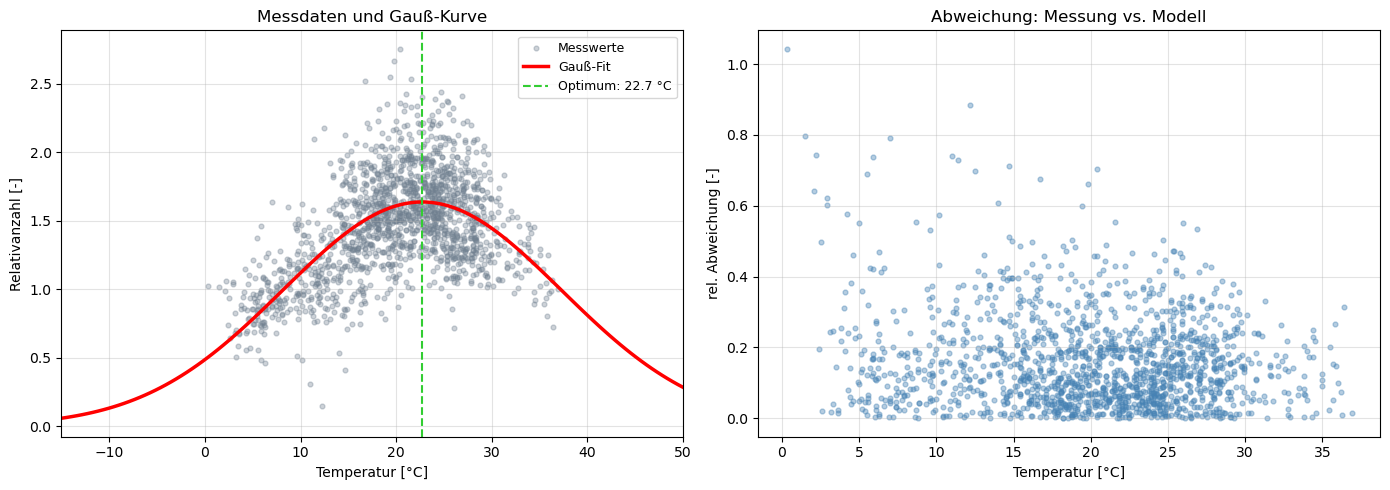

Parameter: a=1.638, b=22.715, c=14.566
=> Beste Temperatur: 22.7 °C


In [14]:
# Hier eigenen Code schreiben ...

# Aufgabe 5: Gauß-Modell für die Temperatur–Radverkehr-Abhängigkeit
# Zeigt, bei welcher Temperatur die meisten Leute Fahrrad fahren

from scipy.optimize import curve_fit

# Gauß-Funktion definieren
# Formel aus der Aufgabe: N(T) = a * exp(-(T-b)²/(2c²))
# a = Höhe des Maximums (Amplitude)
# b = Lage des Maximums (= optimale Temperatur fürs Radfahren)
# c = Breite der Kurve (Standardabweichung)
def gauss(T, a, b, c):
    return a * np.exp(-((T - b)**2) / (2 * c**2))

# Daten fürs Fitting vorbereiten
xdata = teilkombi["TT_TU"].values          # Temperatur
ydata = teilkombi["Relativanzahl"].values  # Relativanzahl

# curve_fit aufrufen
# p0 sind die Startwerte für die Optimierung (laut Aufgabenstellung: alle 1.0)
# popt = optimale Parameter, pcov = Kovarianzmatrix (wird hier nicht weiter verwendet)
popt, pcov = curve_fit(gauss, xdata, ydata, p0=[1.0, 1.0, 1.0])

# Parameter auslesen
a_fit = popt[0]  # Amplitude
b_fit = popt[1]  # Lage des Maximums
c_fit = popt[2]  # Breite

# Beste Temperatur = b (dort liegt das Maximum der Glockenkurve)
beste_temperatur = b_fit

# Zwei Plots nebeneinander erstellen
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linker Plot: Messdaten + gefittete Kurve
ax1 = axes[0]

# Fit-Kurve berechnen von -15 bis 50 °C mit 120 Stützstellen (>100 wie gefordert)
T_fit = np.linspace(-15, 50, 120)
y_fit = gauss(T_fit, a_fit, b_fit, c_fit)

ax1.scatter(xdata, ydata, s=12, alpha=0.35, c="slategray", label="Messwerte")
ax1.plot(T_fit, y_fit, "r-", lw=2.5, label="Gauß-Fit")
ax1.axvline(
    beste_temperatur,
    color="limegreen", ls="--", lw=1.5,
    label=f"Optimum: {beste_temperatur:.1f} °C"
)

ax1.set_xlabel("Temperatur [°C]")
ax1.set_ylabel("Relativanzahl [-]")
ax1.set_title("Messdaten und Gauß-Kurve")
ax1.legend(loc="upper right", fontsize=9)
ax1.grid(alpha=0.35)
ax1.set_xlim(-15, 50)

# Rechter Plot: relative Abweichung vom Modell
ax2 = axes[1]

# Vorhersage für jeden Messpunkt berechnen
y_pred = gauss(xdata, a_fit, b_fit, c_fit)

# Betrag der relativen Abweichung: |Messwert - Vorhersage| / |Vorhersage|
rel_err = np.abs((ydata - y_pred) / y_pred)

ax2.scatter(xdata, rel_err, s=12, alpha=0.4, c="steelblue")
ax2.set_xlabel("Temperatur [°C]")
ax2.set_ylabel("rel. Abweichung [-]")
ax2.set_title("Abweichung: Messung vs. Modell")
ax2.grid(alpha=0.35)

plt.tight_layout()
plt.show()

# Ergebnisse ausgeben
print(f"Parameter: a={a_fit:.3f}, b={b_fit:.3f}, c={c_fit:.3f}")
print(f"=> Beste Temperatur: {beste_temperatur:.1f} °C")

In [15]:
# Hier sind einige Plausibilitätstest:
assert 0.9 < b_fit/c_fit/a_fit < 1.0 
assert b_fit > c_fit > a_fit
assert 10 < beste_temperatur < 40